**Sam Broth and Max Sender**

Collaboration Plan:
We are working together on this via vscode live share and are talking over zoom. 
In terms of sharing the file we have a github repository set up. We met three times to work in total.




In [68]:
#IMPORTS
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from scipy import stats
import numpy as np

#sqlite file and connection
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Problem 1: 

In [2]:
join_query = "SELECT Teams.teamID, Salaries.yearID, franchID, G, W, CAST(W as REAL)/(Cast(G as REAL))*100 as winPercentage, sum(salary) as total_payroll FROM Teams INNER JOIN Salaries ON Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID group by Salaries.teamID, Salaries.yearID"
new_df = pd.read_sql(join_query, conn)
new_df.head()


,teamID,yearID,franchID,G,W,winPercentage,total_payroll
0,ATL,1985,ATL,162,66,40.740741,14807000.0
1,BAL,1985,BAL,161,83,51.552795,11560712.0
2,BOS,1985,BOS,163,81,49.693252,10897560.0
3,CAL,1985,ANA,162,90,55.555556,14427894.0
4,CHA,1985,CHW,163,85,52.147239,9846178.0


We didn't have to deal with any "missing data" from the two tables because we used an inner join. This takes the teams (and years) that are present in *both* the Teams and Salaries tables.


In [3]:
team_query = "SELECT Teams.teamID, Salaries.yearID, franchID, G, W, CAST(W as REAL)/(Cast(G as REAL))*100 as winPercentage, sum(salary) as total_payroll FROM Teams INNER JOIN Salaries ON Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID WHERE Teams.teamID = 'NYA' group by Salaries.teamID, Salaries.yearID"
nyy_df = pd.read_sql(team_query, conn)
nyy_df


,teamID,yearID,franchID,G,W,winPercentage,total_payroll
0,NYA,1985,NYY,161,97,60.248447,14238204.0
1,NYA,1986,NYY,162,90,55.555556,18494253.0
2,NYA,1987,NYY,162,89,54.938272,17099714.0
3,NYA,1988,NYY,161,85,52.795031,19441152.0
4,NYA,1989,NYY,161,74,45.962733,17114375.0
5,NYA,1990,NYY,162,67,41.358025,20912318.0
6,NYA,1991,NYY,162,71,43.827160,27344168.0
7,NYA,1992,NYY,162,76,46.913580,37543334.0
8,NYA,1993,NYY,162,88,54.320988,42624900.0
9,NYA,1994,NYY,113,70,61.946903,45731334.0


# Problem 2:

In [35]:
new_df

,teamID,yearID,franchID,G,W,winPercentage,total_payroll
0,ATL,1985,ATL,162,66,40.740741,14807000.0
1,BAL,1985,BAL,161,83,51.552795,11560712.0
2,BOS,1985,BOS,163,81,49.693252,10897560.0
3,CAL,1985,ANA,162,90,55.555556,14427894.0
4,CHA,1985,CHW,163,85,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,SLN,2014,STL,162,90,55.555556,120693000.0
854,TBA,2014,TBD,162,77,47.530864,72689100.0
855,TEX,2014,TEX,162,67,41.358025,112255059.0
856,TOR,2014,TOR,162,83,51.234568,109920100.0


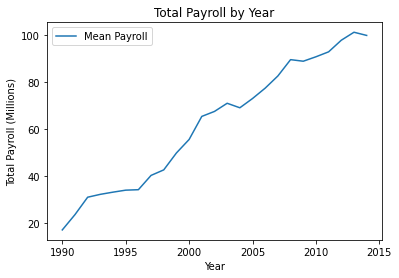

In [41]:
by_year_mean = new_df[new_df.yearID>=1990].groupby('yearID')['total_payroll'].mean()/1000000
by_year_mean.plot.line(title="Total Payroll by Year",xlabel = "Year", ylabel = "Total Payroll (Millions)",legend=True)
plt.legend(["Mean Payroll"])





<AxesSubplot:title={'center':'Win Percentage vs Payroll'}, xlabel='Total Payroll', ylabel='Win Percentage'>

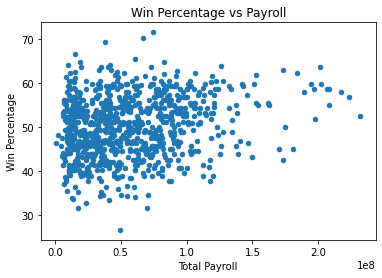

In [33]:
#scatter plot of win percentage vs payroll
new_df.plot.scatter(x='total_payroll', y='winPercentage', title="Win Percentage vs Payroll",xlabel = "Total Payroll", ylabel = "Win Percentage")

# Question 1: 
The range of the teams' total payroll increases drastically. The difference between the top team and bottom team starts out as a small number, and gets to be as big as nearly two hundred million. The mean increases a lot over the past 30 years, but not as much as the maximum total payroll.


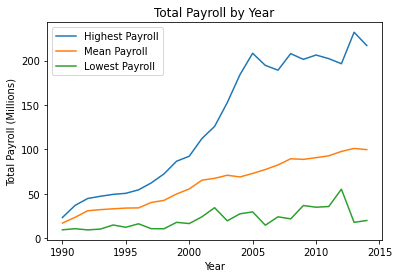

In [42]:
by_year_payroll_max = new_df[new_df.yearID>=1990].groupby('yearID')['total_payroll'].max()/1000000
by_year_mean = new_df[new_df.yearID>=1990].groupby('yearID')['total_payroll'].mean()/1000000
by_year_min = new_df[new_df.yearID>=1990].groupby('yearID')['total_payroll'].min()/1000000
by_year_payroll_max.plot.line(title="Total Payroll by Year",legend=True)
by_year_mean.plot.line(title="Total Payroll by Year",xlabel = "Year",legend=True)
by_year_min.plot.line(title="Total Payroll by Year",xlabel = "Year", ylabel = "Total Payroll (Millions)",legend=True)
plt.legend(["Highest Payroll","Mean Payroll", "Lowest Payroll"])





# Problem 4:

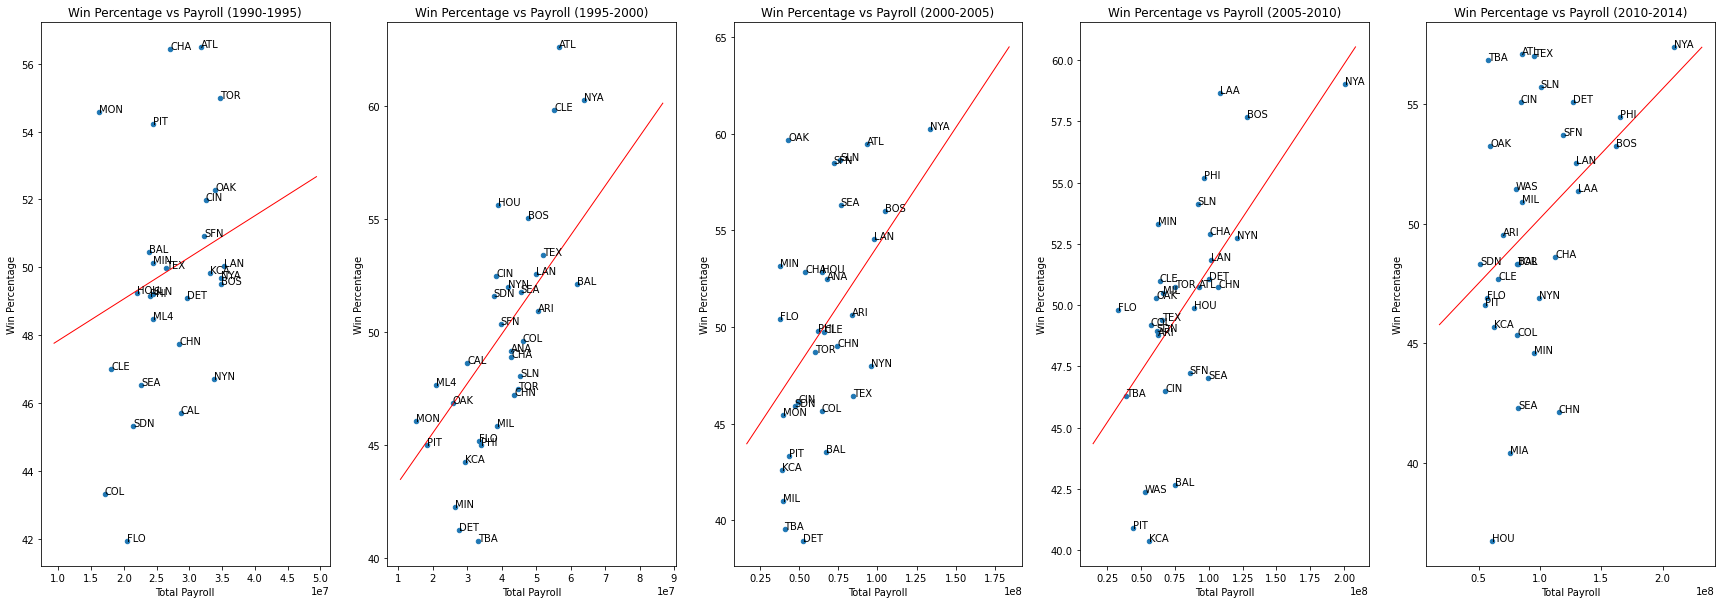

In [94]:
fig, ax = plt.subplots(1, 5, figsize=(30,10))
for i,j in enumerate([[1990,1995], [1995,2000], [2000,2005], [2005,2010], [2010,2014]]):
    scat_df = new_df[(new_df.yearID>=j[0]) & (new_df.yearID<j[1])]
    by_team = scat_df.groupby('teamID').mean()
    #label each point with their teamID
    for k,v in by_team.iterrows():
        ax[i].annotate(k, (v['total_payroll'], v['winPercentage']))
    
     
    by_team.plot.scatter(ax=ax[i],x='total_payroll', y='winPercentage', title='Win Percentage vs Payroll ({})'.format(str(j[0])+'-'+str(j[1])),xlabel = "Total Payroll", ylabel = "Win Percentage")
    
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(scat_df['total_payroll'],
                                                                   scat_df['winPercentage'])
    pts = np.linspace(scat_df['total_payroll'].min(), scat_df['total_payroll'].max(), 500)
    line = slope * pts + intercept
    ax[i].plot(pts, line, lw=1, color='red')
plt.show()
    
#then fro 2010 to 2014

# Question 2:
The Yankees are clearly the biggest spenders - and are very good at paying for wins. The Oakland A's are great at outperforming their expectation (based on total payroll). In the Moneyball period, they are one of the best teams in the league while being one of the lowest spending teams.



# Problem 5:

In [163]:
by_year = new_df.groupby('yearID').total_payroll.mean()
std_year = new_df.groupby('yearID').total_payroll.std()
copy_df = new_df.copy()
def help1(year):
    return by_year[year]
def help2(year):
    return std_year[year]

copy_df["mean"] = help1(new_df["yearID"]).reset_index(drop=True)
copy_df["std"] = help2(new_df["yearID"]).reset_index(drop=True)
new_df["standardized_payroll"] = (copy_df["total_payroll"] - copy_df["mean"])/ copy_df["std"]
new_df.head()

,teamID,yearID,franchID,G,W,winPercentage,total_payroll,standardized_payroll
0,ATL,1985,ATL,162,66,40.740741,14807000.0,1.914905
1,BAL,1985,BAL,161,83,51.552795,11560712.0,0.601068
2,BOS,1985,BOS,163,81,49.693252,10897560.0,0.332678
3,CAL,1985,ANA,162,90,55.555556,14427894.0,1.761474
4,CHA,1985,CHW,163,85,52.147239,9846178.0,-0.092838


# Problem 6:

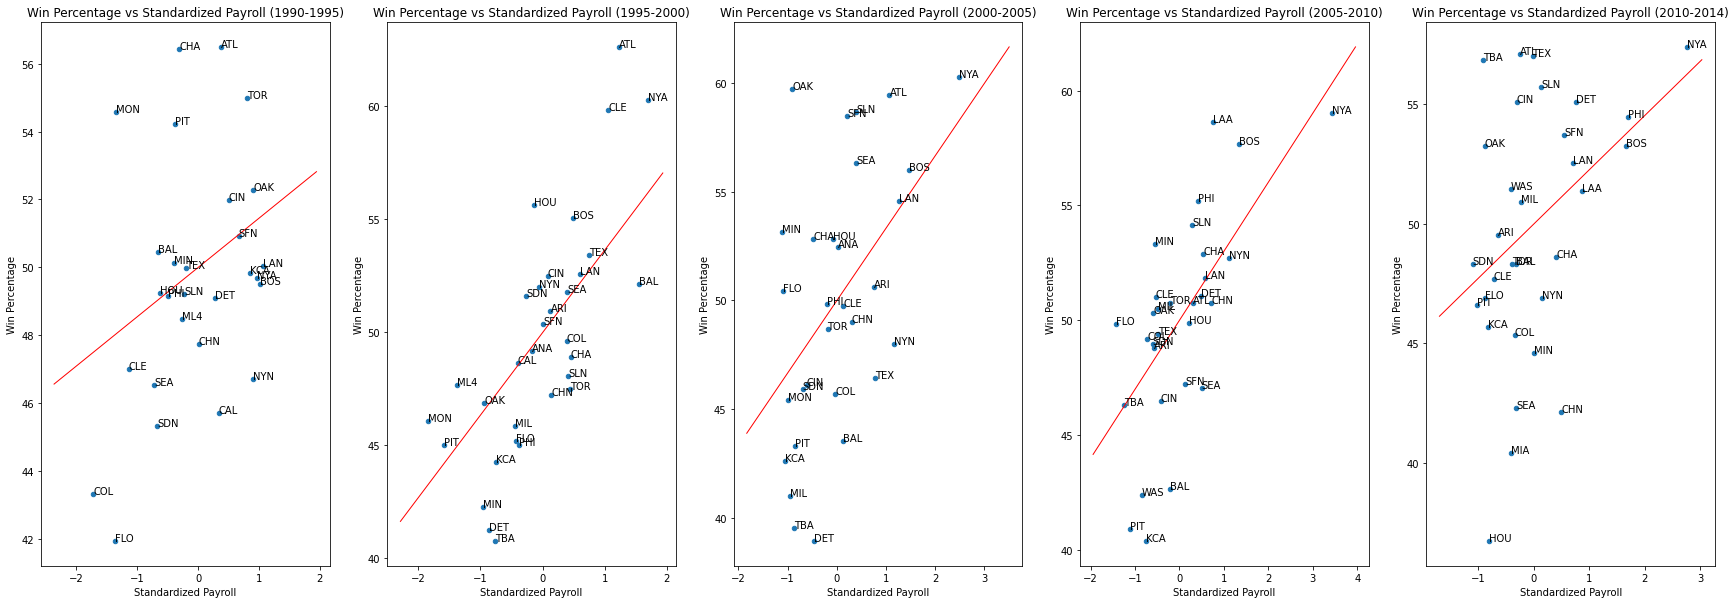

In [165]:
fig, ax = plt.subplots(1, 5, figsize=(30,10))
for i,j in enumerate([[1990,1995], [1995,2000], [2000,2005], [2005,2010], [2010,2014]]):
    scat_df = new_df[(new_df.yearID>=j[0]) & (new_df.yearID<j[1])]
    by_team = scat_df.groupby('teamID').mean()
    #label each point with their teamID
    for k,v in by_team.iterrows():
        ax[i].annotate(k, (v['standardized_payroll'], v['winPercentage']))
    
     
    by_team.plot.scatter(ax=ax[i],x='standardized_payroll', y='winPercentage', title='Win Percentage vs Standardized Payroll ({})'.format(str(j[0])+'-'+str(j[1])),xlabel = "Standardized Payroll", ylabel = "Win Percentage")
    
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(scat_df['standardized_payroll'],
                                                                   scat_df['winPercentage'])
    pts = np.linspace(scat_df['standardized_payroll'].min(), scat_df['standardized_payroll'].max(), 500)
    line = slope * pts + intercept
    ax[i].plot(pts, line, lw=1, color='red')
plt.show()

# Question 3:
It is easier to see now through our linear regression how much payroll affects win percentage. Also, after 2000, the Yankees are far and away spending the most money on their players in relation to other teams. Because payroll is standardized, the line of best fit seems even more aligned - making it a bit harder to see teams clustered towards it, such as in the graph representing 2005-2010.


# Problem 7:

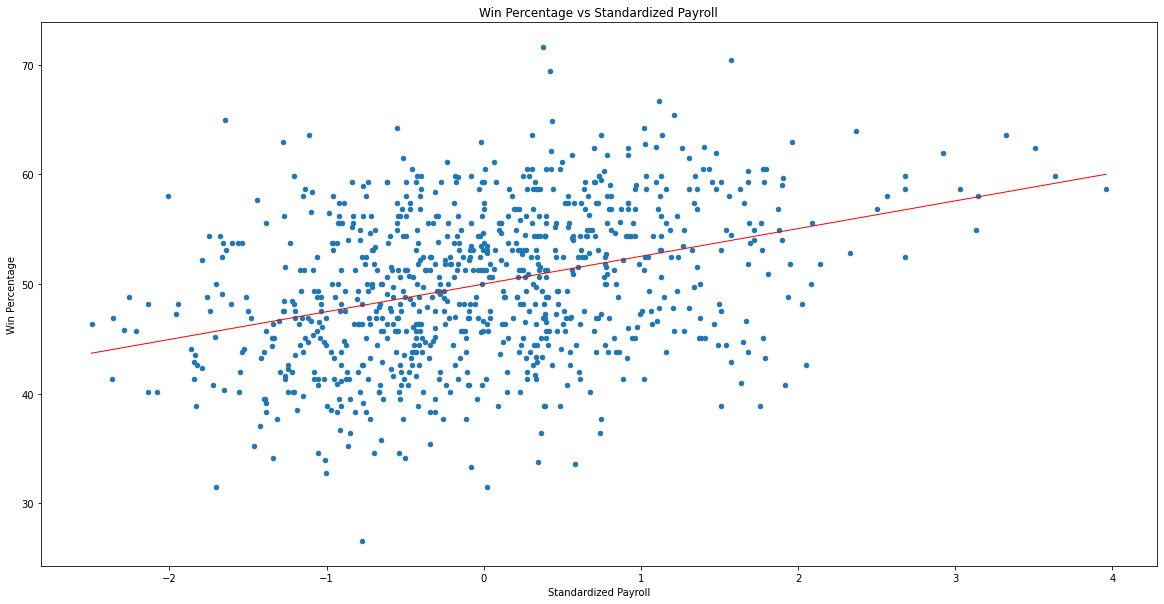

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
new_df.plot.scatter(ax=ax,x='standardized_payroll', y='winPercentage', title='Win Percentage vs Standardized Payroll',xlabel = "Standardized Payroll", ylabel = "Win Percentage")
slope, intercept, r_value, p_value, std_err = stats.linregress(new_df['standardized_payroll'],
                                                                   new_df['winPercentage'])
pts = np.linspace(new_df['standardized_payroll'].min(), new_df['standardized_payroll'].max(), 500)
line = slope * pts + intercept
ax.plot(pts, line, lw=1, color='red')
plt.show()

# Problem 8:

In [180]:
new_df['expected_wp'] = 50 + 2.5 * new_df['standardized_payroll']
new_df['efficiency'] = new_df['winPercentage'] - new_df['expected_wp']
new_df.head()

,teamID,yearID,franchID,G,W,winPercentage,total_payroll,standardized_payroll,expected_wp,efficiency
0,ATL,1985,ATL,162,66,40.740741,14807000.0,1.914905,54.787263,-14.046522
1,BAL,1985,BAL,161,83,51.552795,11560712.0,0.601068,51.502671,0.050124
2,BOS,1985,BOS,163,81,49.693252,10897560.0,0.332678,50.831694,-1.138442
3,CAL,1985,ANA,162,90,55.555556,14427894.0,1.761474,54.403684,1.151872
4,CHA,1985,CHW,163,85,52.147239,9846178.0,-0.092838,49.767906,2.379333


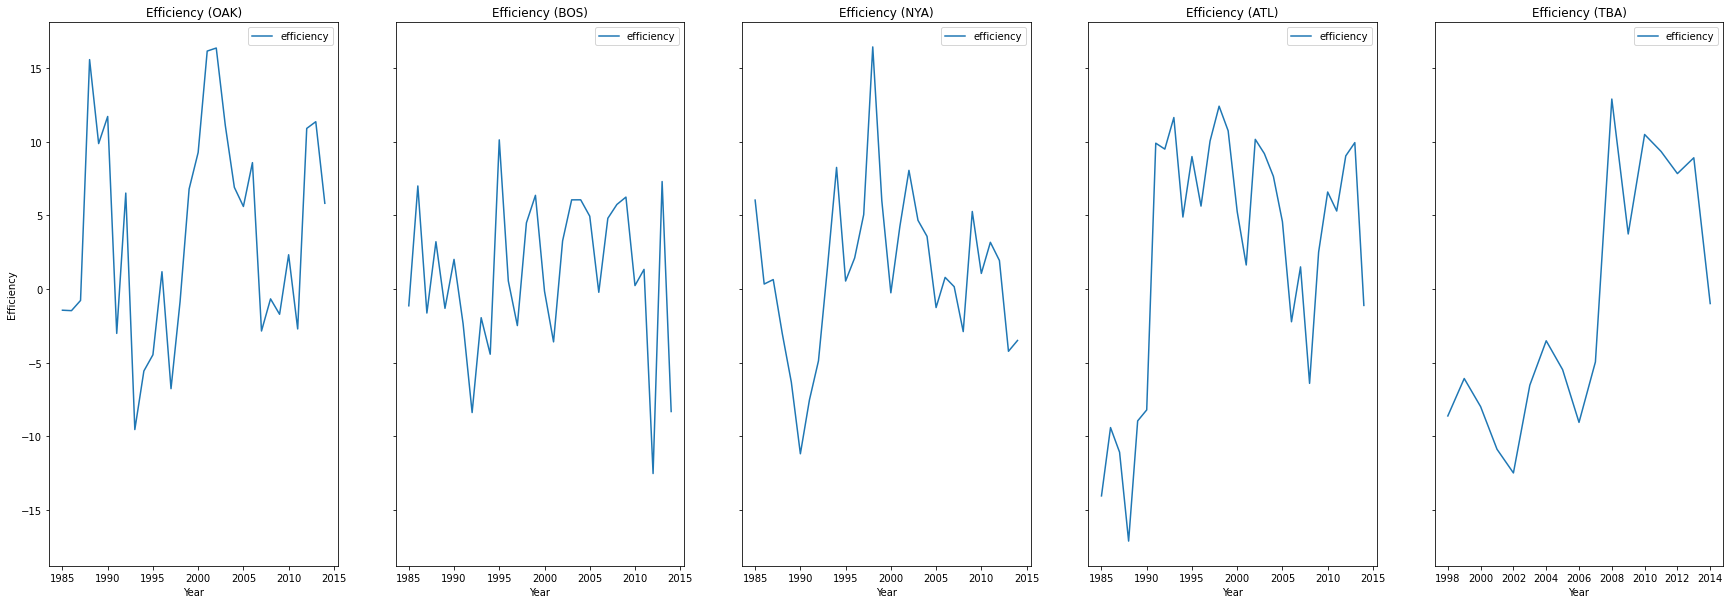

In [192]:
fig, ax = plt.subplots(1, 5,  sharey=True, figsize=(30,10))
for i,team in enumerate(['OAK', 'BOS', 'NYA', 'ATL', 'TBA']):
    line_df = new_df[new_df.teamID==team]
    line_df.plot.line(x='yearID', y='efficiency', title="Efficiency ({}".format(str(team)+')'),xlabel = "Year", ylabel = "Efficiency", ax = ax[i] )
plt.show()

# Question 4:
In this plot, we can very easily see how teams performed compared to how they were expected to given their payroll. This was visible in the first two plots, but much more so now. Oakland's efficiency was immaculate during the Moneyball period - at times outperforming their expected win percentage by over 15 percentage points!
